In [6]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score

In [7]:
path = '/python/datasource/DataRace/'
train = pd.read_csv(path + 'input-02/train_set.csv')
test = pd.read_csv(path + 'input-02/test_set.csv')
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [8]:
import matplotlib.pyplot as plt

(array([22356.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2961.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

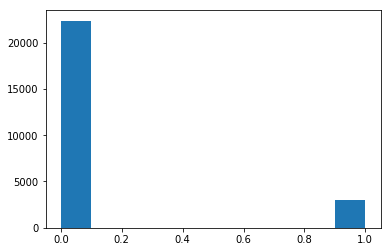

In [9]:
plt.hist(train['y'])

In [10]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,25318,51,housemaid,married,unknown,no,174,no,no,telephone,29,jul,308,3,-1,0,unknown
1,25319,32,management,married,tertiary,no,6059,yes,no,cellular,20,nov,110,2,-1,0,unknown
2,25320,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown
3,25321,32,student,single,tertiary,no,64,no,no,cellular,30,jun,598,4,105,5,failure
4,25322,41,housemaid,married,secondary,no,0,yes,yes,cellular,15,jul,368,4,-1,0,unknown


In [11]:
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,y
ID,1.000000,0.008465,0.032719,-0.020171,0.229149,-0.038265,0.065807,0.047028,0.556627
age,0.008465,1.000000,0.093740,-0.016070,0.000416,0.006171,-0.026431,0.006575,0.029916
balance,0.032719,0.093740,1.000000,0.010245,0.026042,-0.010419,0.001032,0.015792,0.057564
day,-0.020171,-0.016070,0.010245,1.000000,-0.031946,0.168830,-0.092892,-0.050706,-0.031886
duration,0.229149,0.000416,0.026042,-0.031946,1.000000,-0.087780,0.000040,0.001315,0.394746
campaign,-0.038265,0.006171,-0.010419,0.168830,-0.087780,1.000000,-0.089224,-0.031667,-0.075173
pdays,0.065807,-0.026431,0.001032,-0.092892,0.000040,-0.089224,1.000000,0.411688,0.107565
previous,0.047028,0.006575,0.015792,-0.050706,0.001315,-0.031667,0.411688,1.000000,0.088337
y,0.556627,0.029916,0.057564,-0.031886,0.394746,-0.075173,0.107565,0.088337,1.000000


In [15]:
train['y'].value_counts()

0    22356
1     2961
Name: y, dtype: int64

In [13]:
train.job.value_counts()

blue-collar      5456
management       5296
technician       4241
admin.           2909
services         2342
retired          1273
self-employed     884
entrepreneur      856
unemployed        701
housemaid         663
student           533
unknown           163
Name: job, dtype: int64

In [16]:
test['y'] = -1

In [17]:
len(test.columns)

18

In [18]:
data = train.append(test).reset_index(drop=True)
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [10]:
len(train), len(test), len(data)

(25317, 10852, 36169)

In [23]:
import os
import json
import gc
from numba import jit
from tqdm import tqdm_notebook
from tqdm import tqdm
import lightgbm as lgb
import catboost as cbt

import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as std
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import f1_score

import time
import datetime
from datetime import datetime, timedelta

from scipy.signal import hilbert
from scipy.signal import hann
from scipy.signal import convolve
from scipy import stats
import scipy.spatial.distance as dist

from collections import Counter
from statistics import mode

import warnings
warnings.filterwarnings('ignore')
import math
from itertools import product
import ast

In [24]:
cat_col = [i for i in data.select_dtypes(object).columns if i not in ['ID','y']]
for i in tqdm_notebook(cat_col):
    lbl = LabelEncoder()
    data['count_' + i] = data.groupby([i])[i].transform('count')
    data[i] = lbl.fit_transform(data[i].astype(str))

HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

In [19]:
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [20]:
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,...,y,count_job,count_marital,count_education,count_default,count_housing,count_loan,count_contact,count_month,count_poutcome
0,1,43,4,1,2,0,291,1,0,2,...,0,7595,21857,10654,35524,19959,30363,10393,10957,29554
1,2,42,9,0,0,0,5076,1,0,0,...,0,6083,4140,5493,35524,19959,30363,23437,2365,1475
2,3,47,0,1,1,0,104,1,1,0,...,0,4124,21857,18509,35524,19959,5806,23437,5569,29554
3,4,28,4,2,1,0,-994,1,1,0,...,0,7595,10172,18509,35524,19959,5806,23437,5569,29554
4,5,42,9,0,1,0,2974,1,0,2,...,0,6083,4140,18509,35524,19959,30363,10393,10957,29554


In [30]:
feats = [i for i in data.columns if i not in['ID', 'y']]
feats

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'count_job',
 'count_marital',
 'count_education',
 'count_default',
 'count_housing',
 'count_loan',
 'count_contact',
 'count_month',
 'count_poutcome']

In [31]:
model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=30, reg_alpha=0, reg_lambda=0.,
                          max_depth=-1, n_estimators=1500, objective='binary',metric='auc',
                          subsample=0.095, colsample_bytree=0.7,subsample_freq=1,
                          learning_rate=0.2, random_state=2017)

In [32]:
train_x = data[data['y'] != -1][feats]
train_y = data[data['y'] != -1]['y']
test_x = data[data['y'] == -1][feats]


In [27]:
train_x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,count_job,count_marital,count_education,count_default,count_housing,count_loan,count_contact,count_month,count_poutcome
0,43,4,1,2,0,291,1,0,2,9,...,3,7595,21857,10654,35524,19959,30363,10393,10957,29554
1,42,9,0,0,0,5076,1,0,0,7,...,1,6083,4140,5493,35524,19959,30363,23437,2365,1475
2,47,0,1,1,0,104,1,1,0,14,...,3,4124,21857,18509,35524,19959,5806,23437,5569,29554
3,28,4,2,1,0,-994,1,1,0,18,...,3,7595,10172,18509,35524,19959,5806,23437,5569,29554
4,42,9,0,1,0,2974,1,0,2,21,...,3,6083,4140,18509,35524,19959,30363,10393,10957,29554


In [28]:
train_y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [35]:
model.fit(train_x, train_y)
test_pre = model.predict_proba(test_x)[:,1]

In [37]:
len(test_pre)

10852

In [38]:
pre = data[data['y'] == -1][['ID']]
pre['pred']=test_pre


In [39]:
pre.head()

,ID,pred
25317,25318,0.0
25318,25319,0.0
25319,25320,0.0
25320,25321,0.0
25321,25322,0.0


#### 交叉验证

In [40]:
from sklearn.model_selection import KFold

In [41]:
n_splits=10
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_x = data[data['y']!=-1][feats]
train_y = data[data['y']!=-1]['y']
res = data[data['y']==-1][['ID']]

test_x = data[data['y']==-1][feats]
res['pred']=0
for train_idx, val_idx, in kfold.split(train_x):
    model.random_state = model.random_state + 1
    train_x1 = train_x.loc[train_idx]
    train_y1 = train_y.loc[train_idx]
    test_x1 = train_x.loc[val_idx]
    test_y1 = train_y.loc[val_idx]
    model.fit(train_x1, train_y1, eval_set=[(train_x1, train_y1),(test_x1, test_y1)],
              eval_metric='auc',early_stopping_rounds=100)
    res['pred'] += model.predict_proba(test_x)[:,1]
res['pred'] = res['pred']/10

[1]	training's auc: 0.726203	valid_1's auc: 0.717626
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.872518	valid_1's auc: 0.855064
[3]	training's auc: 0.878135	valid_1's auc: 0.861229
[4]	training's auc: 0.880192	valid_1's auc: 0.863334
[5]	training's auc: 0.90129	valid_1's auc: 0.885359
[6]	training's auc: 0.911643	valid_1's auc: 0.895622
[7]	training's auc: 0.911451	valid_1's auc: 0.894246
[8]	training's auc: 0.916884	valid_1's auc: 0.898221
[9]	training's auc: 0.916837	valid_1's auc: 0.895186
[10]	training's auc: 0.916832	valid_1's auc: 0.891272
[11]	training's auc: 0.920733	valid_1's auc: 0.899557
[12]	training's auc: 0.922175	valid_1's auc: 0.901855
[13]	training's auc: 0.923235	valid_1's auc: 0.901225
[14]	training's auc: 0.922954	valid_1's auc: 0.900556
[15]	training's auc: 0.925379	valid_1's auc: 0.903728
[16]	training's auc: 0.926181	valid_1's auc: 0.903097
[17]	training's auc: 0.926304	valid_1's auc: 0.90459
[18]	training's auc: 0.926755	v

[64]	training's auc: 0.931492	valid_1's auc: 0.895416
[65]	training's auc: 0.932108	valid_1's auc: 0.895204
[66]	training's auc: 0.931796	valid_1's auc: 0.894605
[67]	training's auc: 0.932388	valid_1's auc: 0.895276
[68]	training's auc: 0.93244	valid_1's auc: 0.89404
[69]	training's auc: 0.933163	valid_1's auc: 0.89394
[70]	training's auc: 0.932711	valid_1's auc: 0.891033
[71]	training's auc: 0.933236	valid_1's auc: 0.890981
[72]	training's auc: 0.933772	valid_1's auc: 0.888972
[73]	training's auc: 0.934571	valid_1's auc: 0.889662
[74]	training's auc: 0.935625	valid_1's auc: 0.892068
[75]	training's auc: 0.936137	valid_1's auc: 0.892435
[76]	training's auc: 0.936111	valid_1's auc: 0.891628
[77]	training's auc: 0.934792	valid_1's auc: 0.88957
[78]	training's auc: 0.935872	valid_1's auc: 0.890036
[79]	training's auc: 0.93621	valid_1's auc: 0.891762
[80]	training's auc: 0.935698	valid_1's auc: 0.888879
[81]	training's auc: 0.936425	valid_1's auc: 0.890653
[82]	training's auc: 0.93616	vali

Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.887445	valid_1's auc: 0.877242
[3]	training's auc: 0.898338	valid_1's auc: 0.893687
[4]	training's auc: 0.906002	valid_1's auc: 0.90547
[5]	training's auc: 0.909083	valid_1's auc: 0.909006
[6]	training's auc: 0.910554	valid_1's auc: 0.909881
[7]	training's auc: 0.913223	valid_1's auc: 0.912632
[8]	training's auc: 0.914168	valid_1's auc: 0.913962
[9]	training's auc: 0.915583	valid_1's auc: 0.914576
[10]	training's auc: 0.918161	valid_1's auc: 0.916758
[11]	training's auc: 0.919643	valid_1's auc: 0.920028
[12]	training's auc: 0.919742	valid_1's auc: 0.920334
[13]	training's auc: 0.920421	valid_1's auc: 0.916713
[14]	training's auc: 0.921998	valid_1's auc: 0.916818
[15]	training's auc: 0.92271	valid_1's auc: 0.916121
[16]	training's auc: 0.923076	valid_1's auc: 0.915952
[17]	training's auc: 0.924254	valid_1's auc: 0.91639
[18]	training's auc: 0.924841	valid_1's auc: 0.917462
[19]	training's auc: 0.926034	v

[72]	training's auc: 0.931732	valid_1's auc: 0.892086
[73]	training's auc: 0.931361	valid_1's auc: 0.889621
[74]	training's auc: 0.931871	valid_1's auc: 0.889631
[75]	training's auc: 0.931106	valid_1's auc: 0.887588
[76]	training's auc: 0.922894	valid_1's auc: 0.878922
[77]	training's auc: 0.923088	valid_1's auc: 0.87957
[78]	training's auc: 0.916694	valid_1's auc: 0.869632
[79]	training's auc: 0.922921	valid_1's auc: 0.876172
[80]	training's auc: 0.925978	valid_1's auc: 0.877771
[81]	training's auc: 0.927736	valid_1's auc: 0.879031
[82]	training's auc: 0.92686	valid_1's auc: 0.87696
[83]	training's auc: 0.926538	valid_1's auc: 0.875199
[84]	training's auc: 0.92793	valid_1's auc: 0.876447
[85]	training's auc: 0.92572	valid_1's auc: 0.876233
[86]	training's auc: 0.908335	valid_1's auc: 0.854727
[87]	training's auc: 0.914543	valid_1's auc: 0.862545
[88]	training's auc: 0.914749	valid_1's auc: 0.865396
[89]	training's auc: 0.919905	valid_1's auc: 0.871606
[90]	training's auc: 0.922399	val